# Studi Penerapan Berbagai Metode Logika Fuzzy
Notebook ini berisi contoh penerapan 4 metode fuzzy:
1. Mamdani
2. Sugeno
3. Tsukamoto
4. Fuzzy Associative Memory (FAM)

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## Contoh 1: Metode Mamdani - Kontrol Kecepatan Kipas

In [7]:
# Variabel
suhu = ctrl.Antecedent(np.arange(0, 41, 1), 'suhu')
kelembaban = ctrl.Antecedent(np.arange(0, 101, 1), 'kelembaban')
kipas = ctrl.Consequent(np.arange(0, 101, 1), 'kipas')

# Membership functions
suhu['dingin'] = fuzz.trimf(suhu.universe, [0, 0, 20])
suhu['normal'] = fuzz.trimf(suhu.universe, [15, 25, 35])
suhu['panas'] = fuzz.trimf(suhu.universe, [30, 40, 40])

kelembaban['rendah'] = fuzz.trimf(kelembaban.universe, [0, 0, 50])
kelembaban['sedang'] = fuzz.trimf(kelembaban.universe, [30, 50, 70])
kelembaban['tinggi'] = fuzz.trimf(kelembaban.universe, [60, 100, 100])

kipas['lambat'] = fuzz.trimf(kipas.universe, [0, 0, 50])
kipas['sedang'] = fuzz.trimf(kipas.universe, [25, 50, 75])
kipas['cepat'] = fuzz.trimf(kipas.universe, [50, 100, 100])

(None, None, None)

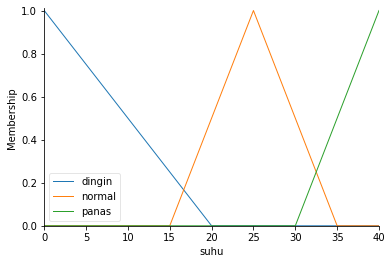

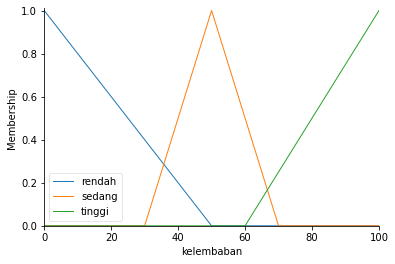

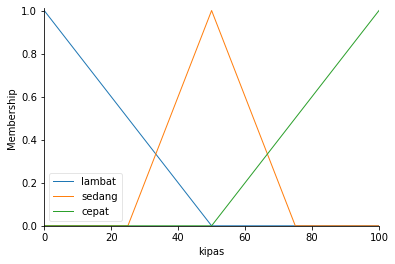

In [8]:
suhu.view(), kelembaban.view(), kipas.view()

Output kecepatan kipas (Mamdani): 50.0


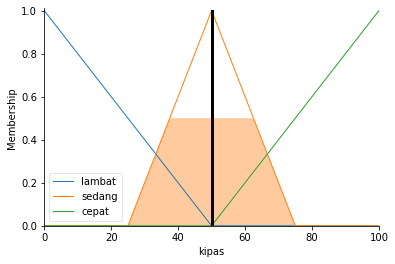

In [11]:
# Aturan
rule1 = ctrl.Rule(suhu['dingin'] & kelembaban['rendah'], kipas['lambat'])
rule2 = ctrl.Rule(suhu['normal'] & kelembaban['sedang'], kipas['sedang'])
rule3 = ctrl.Rule(suhu['panas'] & kelembaban['tinggi'], kipas['cepat'])

kipas_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
kipas_sim = ctrl.ControlSystemSimulation(kipas_ctrl)

kipas_sim.input['suhu'] = 30
kipas_sim.input['kelembaban'] = 60
kipas_sim.compute()
print("Output kecepatan kipas (Mamdani):", kipas_sim.output['kipas'])
kipas.view(sim=kipas_sim)

## Contoh 2: Metode Sugeno - Penilaian Risiko Banjir

In [12]:
# Variabel
hujan = ctrl.Antecedent(np.arange(0, 101, 1), 'hujan')
sungai = ctrl.Antecedent(np.arange(0, 11, 1), 'sungai')
risiko = ctrl.Consequent(np.arange(0, 101, 1), 'risiko')

hujan['rendah'] = fuzz.trimf(hujan.universe, [0, 0, 50])
hujan['tinggi'] = fuzz.trimf(hujan.universe, [30, 100, 100])

sungai['normal'] = fuzz.trimf(sungai.universe, [0, 0, 5])
sungai['tinggi'] = fuzz.trimf(sungai.universe, [3, 10, 10])

risiko['rendah'] = fuzz.singleton(risiko.universe, 20)
risiko['tinggi'] = fuzz.singleton(risiko.universe, 80)

rule1 = ctrl.Rule(hujan['rendah'] & sungai['normal'], risiko['rendah'])
rule2 = ctrl.Rule(hujan['tinggi'] | sungai['tinggi'], risiko['tinggi'])

banjir_ctrl = ctrl.ControlSystem([rule1, rule2])
banjir_sim = ctrl.ControlSystemSimulation(banjir_ctrl)

banjir_sim.input['hujan'] = 70
banjir_sim.input['sungai'] = 6
banjir_sim.compute()
print("Risiko banjir (Sugeno):", banjir_sim.output['risiko'])

AttributeError: module 'skfuzzy' has no attribute 'singleton'

## Contoh 3: Metode Tsukamoto - Penilaian Pinjaman

Jumlah pinjaman (Tsukamoto): 73.27241487035309


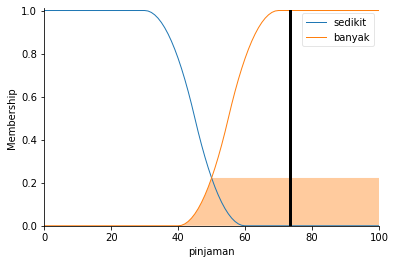

In [13]:
# Pendekatan Tsukamoto mensyaratkan output fuzzy bersifat monoton
penghasilan = ctrl.Antecedent(np.arange(0, 11, 1), 'penghasilan')
jaminan = ctrl.Antecedent(np.arange(0, 11, 1), 'jaminan')
pinjaman = ctrl.Consequent(np.arange(0, 101, 1), 'pinjaman')

penghasilan['rendah'] = fuzz.zmf(penghasilan.universe, 2, 5)
penghasilan['tinggi'] = fuzz.smf(penghasilan.universe, 5, 8)

jaminan['rendah'] = fuzz.zmf(jaminan.universe, 2, 5)
jaminan['tinggi'] = fuzz.smf(jaminan.universe, 5, 8)

pinjaman['sedikit'] = fuzz.zmf(pinjaman.universe, 30, 60)
pinjaman['banyak'] = fuzz.smf(pinjaman.universe, 40, 70)

rule1 = ctrl.Rule(penghasilan['rendah'] | jaminan['rendah'], pinjaman['sedikit'])
rule2 = ctrl.Rule(penghasilan['tinggi'] & jaminan['tinggi'], pinjaman['banyak'])

pinjaman_ctrl = ctrl.ControlSystem([rule1, rule2])
pinjaman_sim = ctrl.ControlSystemSimulation(pinjaman_ctrl)

pinjaman_sim.input['penghasilan'] = 7
pinjaman_sim.input['jaminan'] = 6
pinjaman_sim.compute()
print("Jumlah pinjaman (Tsukamoto):", pinjaman_sim.output['pinjaman'])
pinjaman.view(sim=pinjaman_sim)

## Contoh 4: Metode FAM - Kecepatan Kipas (Alternatif Mamdani)

Output kecepatan kipas (FAM): 50.0


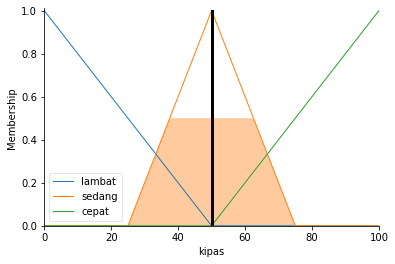

In [15]:
# Gunakan variabel yang sama dengan Mamdani
fam_rule1 = ctrl.Rule(suhu['dingin'] & kelembaban['rendah'], kipas['lambat'])
fam_rule2 = ctrl.Rule(suhu['normal'] & kelembaban['sedang'], kipas['sedang'])
fam_rule3 = ctrl.Rule(suhu['panas'] & kelembaban['tinggi'], kipas['cepat'])

fam_ctrl = ctrl.ControlSystem([fam_rule1, fam_rule2, fam_rule3])
fam_sim = ctrl.ControlSystemSimulation(fam_ctrl)

fam_sim.input['suhu'] = 30
fam_sim.input['kelembaban'] = 60
fam_sim.compute()
print("Output kecepatan kipas (FAM):", fam_sim.output['kipas'])
kipas.view(sim=fam_sim)